In [1]:
%matplotlib inline
import numpy as np
from numpy import sin, cos, tan
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
# plt.style.use(astropy_mpl_style)

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS, Angle

In [15]:
# Can I
hip30438 = SkyCoord.from_name("HIP 30438")

print(hip30438)

<SkyCoord (ICRS): (ra, dec) in deg
    (95.98795783, -52.69566138)>


In [3]:
lat = 36.2 * u.degree

In [4]:
sinh = sin(lat) * sin(hip30438.dec) + cos(lat) * cos(hip30438.dec) * sin(hip30438.ra)
h = np.arcsin(sinh)

tanA = cos(hip30438.ra) / (cos(lat) * tan(hip30438.dec) - sin(lat) * sin(hip30438.ra))
sinA = cos(hip30438.ra) * cos(hip30438.dec) / cos(h)
cosA = sinA / tanA
A = np.arctan2(sinA, cosA) + 360 * u.deg

print("A, h =", A.to(u.deg), h.to(u.deg))

A, h = 183.62530915532935 deg 0.9514274552678419 deg


In [5]:
# Multi-Epoch
year_arr = np.arange(0, 4000, 1)

# Number of days for every year
date_nb = np.ones_like(year_arr)
date_nb = np.where(year_arr % 4 == 0, 366, 365)
date_nb = np.where((year_arr % 100 == 0) & (
    year_arr % 400 != 0), 365, date_nb)

total_date_nb = np.zeros_like(year_arr)
for i in range(year_arr.size):
    total_date_nb[i] = np.sum(date_nb[:i+1])

total_jyear_nb = total_date_nb / 365.25

In [6]:
eps = Angle("23d26m21.448s")
p1 = 5029.0966
p2 = 4612.4362
print(p1 * cos(eps))

4614.105918913111


In [29]:
# Precession rate
pra = 4612.4362 * u.arcsec
# pdec = 2004.3109 * u.arcsec

# The correction of RA and Dec.
dra = pra * total_jyear_nb / 100
# ddec = pdec * total_jyear_nb / 100

# print(np.max(hip30438.dec + ddec))

In [40]:
sinh = sin(lat) * sin(hip30438.dec + ddec) + cos(lat) * \
    cos(hip30438.dec + ddec) * sin(hip30438.ra + dra)
h = np.arcsin(sinh)

tanA = cos(hip30438.ra + dra) / (cos(lat) *
                           tan(hip30438.dec + ddec) - sin(lat) * sin(hip30438.ra + dra))
sinA = cos(hip30438.ra + dra) * cos(hip30438.dec + ddec) / cos(h)
cosA = sinA / tanA
A = np.arctan2(sinA, cosA) + 360 * u.degree

# print("A, h =", A.to(u.deg), h.to(u.deg))

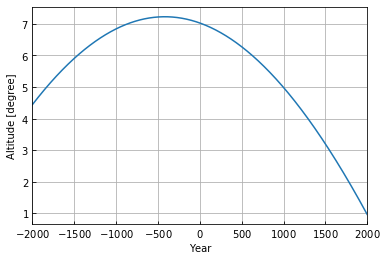

In [33]:
# plt.plot(2000 - total_jyear_nb, A.to(u.deg), label="A")
plt.plot(2000 - total_jyear_nb, h.to(u.deg), label="h")

plt.xlim(-2000, 2000)
# plt.ylim(-25, 5)
plt.xlabel("Year")
plt.ylabel("Altitude [degree]")

plt.grid()
plt.show()

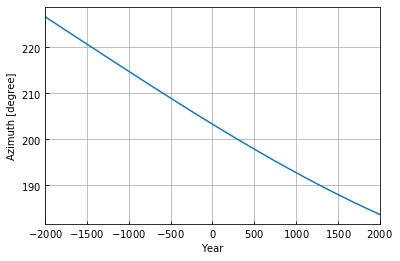

In [44]:
plt.plot(2000 - total_jyear_nb, A.to(u.degree), label="A")

plt.xlim(-2000, 2000)
# plt.ylim(-25, 5)
plt.xlabel("Year")
plt.ylabel("Azimuth [degree]")
plt.grid()
plt.savefig("Azimuth.png")
plt.savefig("/Users/Neo/Desktop/Azimuth.png")